<a href="https://colab.research.google.com/github/DSEI21000-S21/project-product-price-prediction/blob/main/experiment/feature_extraction/FeatureExtraction_ItemDescription_E1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Google Drive Authen
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [5]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [12]:
# download sample data
drive.CreateFile({"id":"18Q86UkTlN2_hr5EviqMpAo9JKNE9jUsf"}).GetContentFile("sample_data.csv")

# download python functions
drive.CreateFile({"id":"1lQtmsLASMJJliF0XqIErqSaXRLkZeCWW"}).GetContentFile("extract_text_info.py")
drive.CreateFile({"id":"1F23_gW912a0RqBHQEKCWyIX0h_iVlUHF"}).GetContentFile("clean_text.py")


# import functions from those python file
from extract_text_info import extract_general_text_info
from extract_text_info import extract_word_counts
from clean_text import clean_text


In [27]:
df = pd.read_csv("sample_data.csv")

In [28]:
df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,748447,Polaroid Camera,3,Electronics/Cameras & Photography/Film Photogr...,NaN,27.0,1,Film not included
1,674932,Vintage Ashtray,3,Vintage & Collectibles/Housewares/Coaster,NaN,8.0,0,Sip n Smoke ashtray. Would make a cute gift!
2,586672,Matilda Jane weekender nwt,1,Women/Women's Handbags/Other,NaN,52.0,0,NWT. Matilda Jane Clothing weekender bag. Over...
3,846012,Red Full Lace Wig,3,Women/Women's Accessories/Hair Accessories,NaN,69.0,0,12 inches
4,1026408,EQUATE NICOTINE TRANSDERMAL SYSTEM,1,Other/Daily & Travel items/Personal Care,NaN,19.0,0,13 patches left. Too strong for my husband.


# **Pre-processing the text**

**Remove Stopwords, Punctuation, Spelling and do Lemmatization**

In [13]:
# Declare a list of stop words to use
stop_words = stopwords.words('english')

# Clean the text by removing punctuation
clean_text(df,"item_description",stop_words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


(     train_id  ... number_count
 0      748447  ...            0
 1      674932  ...            0
 2      586672  ...            0
 3      846012  ...            1
 4     1026408  ...            1
 ..        ...  ...          ...
 995    581369  ...            2
 996    589933  ...            0
 997    607839  ...            0
 998    551139  ...            2
 999    499736  ...            0
 
 [1000 rows x 14 columns], 'clean_item_description')

In [12]:
# extract general text info and visualizing stop, punct counts
extract_general_text_info(df,"item_description",stop_words )

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,clean_item_description,upper_word_count,upper_char_count,stopword_count,punctuation_count,number_count
0,748447,Polaroid Camera,3,Electronics/Cameras & Photography/Film Photogr...,NaN,27.0,1,Film not included,film included,0,1,1,0,0
1,674932,Vintage Ashtray,3,Vintage & Collectibles/Housewares/Coaster,NaN,8.0,0,Sip n Smoke ashtray. Would make a cute gift!,sip n smoke astray would make cut gift,0,3,1,2,0
2,586672,Matilda Jane weekender nwt,1,Women/Women's Handbags/Other,NaN,52.0,0,NWT. Matilda Jane Clothing weekender bag. Over...,not manila jane clothing weekend bag overnight...,1,7,0,7,0
3,846012,Red Full Lace Wig,3,Women/Women's Accessories/Hair Accessories,NaN,69.0,0,12 inches,12 inches,0,0,0,0,1
4,1026408,EQUATE NICOTINE TRANSDERMAL SYSTEM,1,Other/Daily & Travel items/Personal Care,NaN,19.0,0,13 patches left. Too strong for my husband.,13 patches left strong husband,0,1,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,581369,Dansko Clogs,3,Women/Shoes/Mules & Clogs,Dansko,45.0,1,"Great used condition size 38, Dansko Clogs. Bl...",great used condition size 38 dans clots black ...,8,22,58,17,0
996,589933,Men's BKE jeans,2,"Men/Jeans/Classic, Straight Leg",BKE,23.0,1,No description yet,description yet,0,1,1,0,0
997,607839,Lularoe L Randy & OS Leggings,1,"Women/Athletic Apparel/Pants, Tights, Leggings",NaN,45.0,1,Brand new firm price,brand new firm price,0,1,0,0,0
998,551139,Rae Dunn Home Bowl Set of 2 Red Interior,1,Home/Kitchen & Dining/Dining & Entertaining,Rae Dunn,40.0,0,"Set of 2 Rae Dunn Home Bowls, brand new releas...",set 2 are dung home bowls brand new release re...,0,13,16,9,1


In [13]:
# before clean up 
df.iloc[:,8:].sum()

clean_item_description    film includedsip n smoke astray would make cut...
upper_word_count                                                       1929
upper_char_count                                                      12786
stopword_count                                                         7545
punctuation_count                                                      5924
number_count                                                            535
dtype: object

In [14]:
# extract general text info in the clean_item_description. It did remove most of the stopword and punctuations
extract_general_text_info(df,"clean_item_description",stop_words )

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,clean_item_description,upper_word_count,upper_char_count,stopword_count,punctuation_count,number_count
0,748447,Polaroid Camera,3,Electronics/Cameras & Photography/Film Photogr...,NaN,27.0,1,Film not included,film included,0,0,0,0,0
1,674932,Vintage Ashtray,3,Vintage & Collectibles/Housewares/Coaster,NaN,8.0,0,Sip n Smoke ashtray. Would make a cute gift!,sip n smoke astray would make cut gift,0,0,0,0,0
2,586672,Matilda Jane weekender nwt,1,Women/Women's Handbags/Other,NaN,52.0,0,NWT. Matilda Jane Clothing weekender bag. Over...,not manila jane clothing weekend bag overnight...,0,0,1,0,0
3,846012,Red Full Lace Wig,3,Women/Women's Accessories/Hair Accessories,NaN,69.0,0,12 inches,12 inches,0,0,0,0,1
4,1026408,EQUATE NICOTINE TRANSDERMAL SYSTEM,1,Other/Daily & Travel items/Personal Care,NaN,19.0,0,13 patches left. Too strong for my husband.,13 patches left strong husband,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,581369,Dansko Clogs,3,Women/Shoes/Mules & Clogs,Dansko,45.0,1,"Great used condition size 38, Dansko Clogs. Bl...",great used condition size 38 dans clots black ...,0,0,2,0,2
996,589933,Men's BKE jeans,2,"Men/Jeans/Classic, Straight Leg",BKE,23.0,1,No description yet,description yet,0,0,0,0,0
997,607839,Lularoe L Randy & OS Leggings,1,"Women/Athletic Apparel/Pants, Tights, Leggings",NaN,45.0,1,Brand new firm price,brand new firm price,0,0,0,0,0
998,551139,Rae Dunn Home Bowl Set of 2 Red Interior,1,Home/Kitchen & Dining/Dining & Entertaining,Rae Dunn,40.0,0,"Set of 2 Rae Dunn Home Bowls, brand new releas...",set 2 are dung home bowls brand new release re...,0,0,1,0,2


In [15]:
# after clean up 
df.iloc[:,8:].sum()

clean_item_description    film includedsip n smoke astray would make cut...
upper_word_count                                                          0
upper_char_count                                                          0
stopword_count                                                          601
punctuation_count                                                         0
number_count                                                            967
dtype: object

# **Perform Text Feature Extraction**

*Explore various Text Feature Extraction Methods*


1.   CountVectorizer from Sklearn
2.   Tfidfvectorizer from Sklearn
3.   HashingVectorizer from Sklearn
 




In [35]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

In [36]:
# Instantiate
CV= CountVectorizer()
TV = TfidfVectorizer()
HV = HashingVectorizer(n_features=1000)



In [37]:
# Fit and Transform the text and create a new df for each method
corpus = df["clean_item_description"].values.astype('U') # convert object to str

# CV Convert a collection of text documents to a matrix of token counts
CV_df = CV.fit_transform(corpus).toarray()

# TV Convert a collection of raw documents to a matrix of TF-IDF features.
TV_df = TV.fit_transform(corpus).toarray()

# HV Convert a collection of text documents to a matrix of token occurrences
HV_df = HV.fit_transform(corpus).toarray()

In [9]:
len(CV.get_feature_names())

3933

In [10]:
len(TV.get_feature_names())

3933

**Visualize Word Vector in 2D**

In [13]:
TV_df = pd.DataFrame(TV_df, columns = TV.get_feature_names())
TV_df.head()

,003,005,01,012,017,02,03,04,05,0518,06,075,10,100,1000s,101,1010,1012,1015,106,10seagirl,10x13,11,110mm,1112,118,12,120,1200mah,1214,1218,125,12654,12x155,12x4,13,139,14,1416,142mm,...,workshop,world,worn,wornbroke,wornused,worry,worse,would,wouldn,wounded,woven,wrap,wrapped,wrinkled,wrist,wristwatches,write,writing,wrong,xsmallsmall,xx,xxxi,yankee,yarn,yeah,year,yearly,years,yellow,yes,yet,yezzus,york,you,young,your,youth,ze,zip,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.314863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.659623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.42724,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


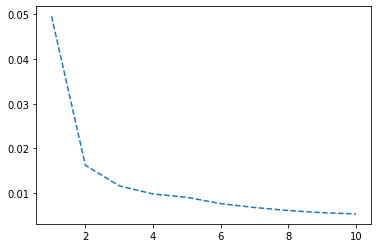

Explained variation per principal component: [0.05058727 0.01659712]


In [14]:
# Instatntiate the PCA object
pca = PCA()

# Fit transform on data
pca_results = pca.fit_transform(TV_df)


# Find explained_variance = eigenvalue for each eigen vector
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio_cum = explained_variance_ratio.cumsum()

# Plot the explained variance and cumulative % explained variance
plt.plot(range(1,11,1),explained_variance[:10],linestyle = "--")
plt.show()

# add pca components to TV_df
TV_df['PCA_one'] = pca_results.T[:,0]
TV_df['PCA_two'] = pca_results.T[:,1]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_[:2]))

**Choose 2 Principal components for word**

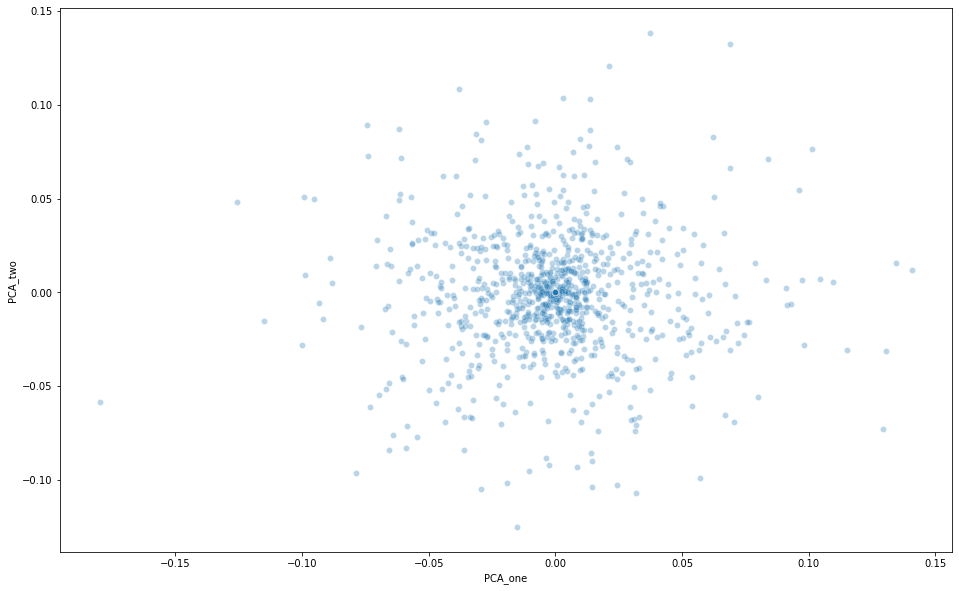

In [15]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="PCA_one", y="PCA_two",
    palette=sns.color_palette("hls", 10),
    data=TV_df,
    legend="full",
    alpha=0.3
)
plt.show()

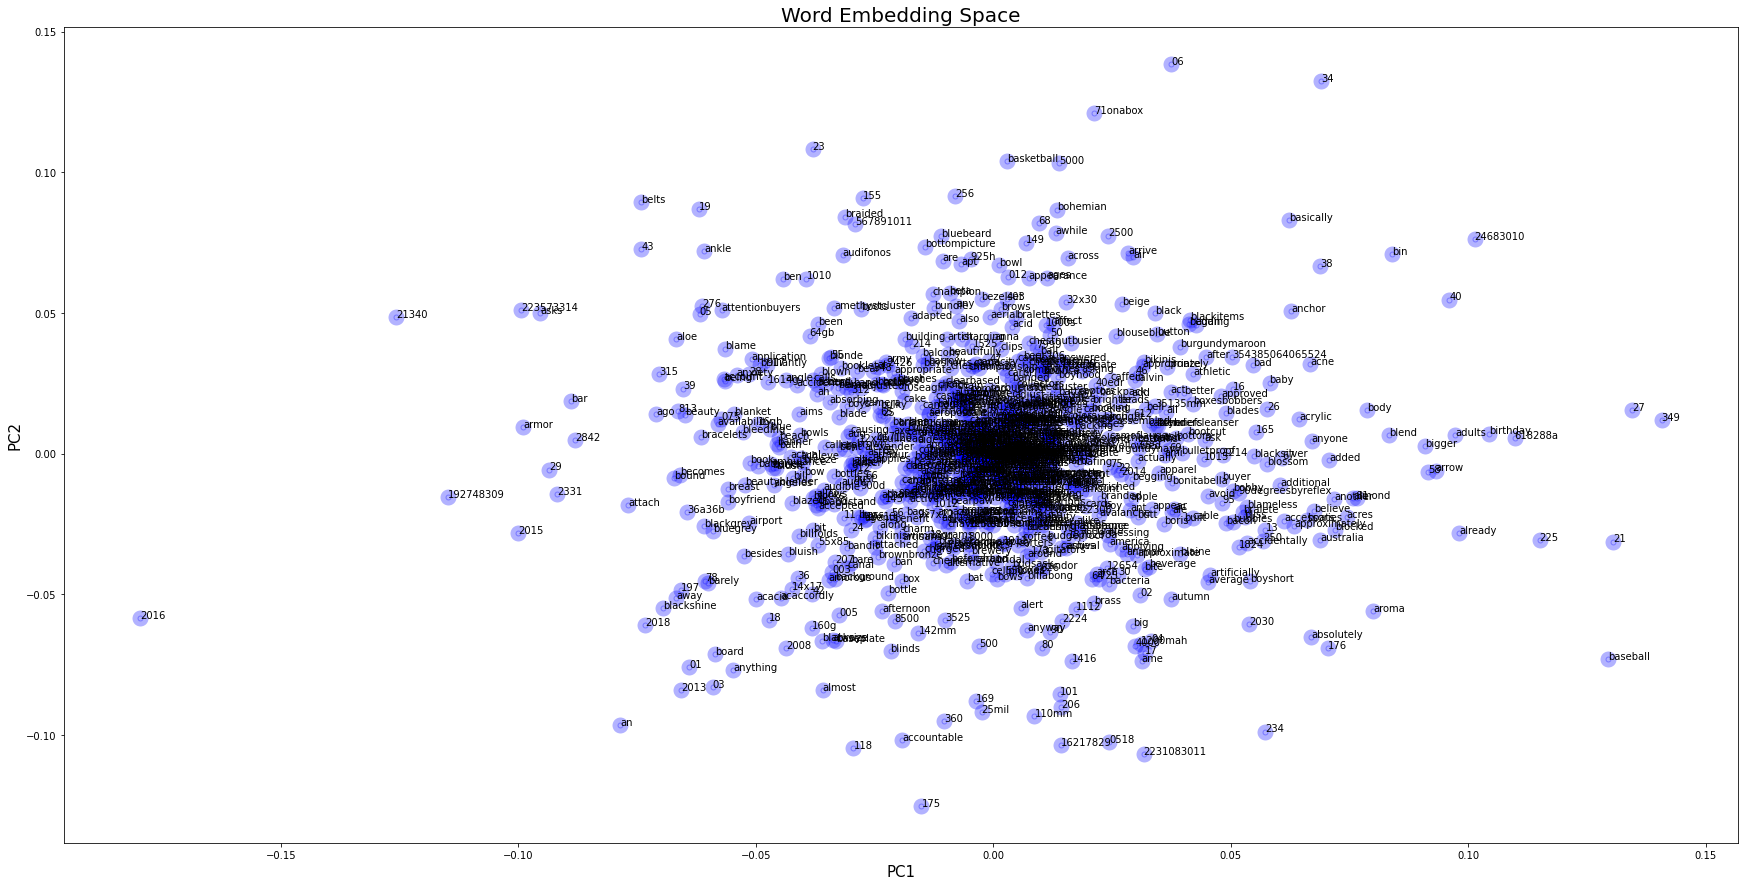

In [16]:
# visualize the first 1000 words in the 2 PC space

plt.figure(figsize=(30,15))
plt.scatter(TV_df.loc[:,"PCA_one"],TV_df.loc[:,"PCA_two"],linewidths=10,color='blue', alpha = 0.3)
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space",size=20)
vocab=list(TV_df.columns[:1000].values)
for i, word in enumerate(vocab):
  plt.annotate(word,xy=(TV_df.loc[i,"PCA_one"],TV_df.loc[i,"PCA_two"]))

## **Use Metrics to Evaluate each Method**

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [45]:
df = pd.read_csv("sample_data.csv")

In [46]:
# Find the y value
y = df.price.values
y.shape

(1000,)

In [47]:
# Regression from the item_description column vectorized by CV
CV_reg = LinearRegression().fit(CV_df, y)
# Regression from the item_description column vectorized by TV
TV_reg = LinearRegression().fit(TV_df, y)
# Regression from the item_description column vectorized by HV
HV_reg = LinearRegression().fit(HV_df, y)


# predicted y through CV_reg
y_pred_CV = CV_reg.predict(CV_df)
# predicted y through TV_reg
y_pred_TV = TV_reg.predict(TV_df)
# predicted y through HV_reg
y_pred_HV = HV_reg.predict(HV_df)

In [51]:
name = ["CountVectorizer", "TfidfVectorizer","HashingVectorizer"]
MSE = []

# Calculate mean square error
MSE.append(mean_squared_error(y,y_pred_CV))
MSE.append(mean_squared_error(y,y_pred_TV))
MSE.append(mean_squared_error(y,y_pred_HV))


In [52]:
MSE

[261.71154436692956, 448.17702431322544, 255.71318839551125]

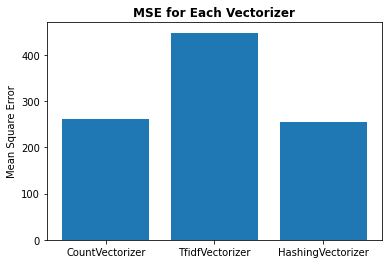

In [53]:
x_pos = [i for i,_ in enumerate(name)]

plt.bar(x_pos, MSE)

plt.ylabel("Mean Square Error")
plt.title("MSE for Each Vectorizer", fontweight = "bold")
plt.xticks(x_pos, name)
plt.show()

*CountVectorizer or HashVectorizer seem to be equally good*